In [1]:
import pandas as pd
import seaborn as sns
import matplotlib

In [2]:
df = (pd.read_json("data/benchmark.jsonl", lines=True)
 .pipe(lambda d: d[d.rep != 0])
 .drop(columns="rep")
 .groupby(["model_scale", "num_threads", "batch_size", "context_length", "num_tokens"]).mean().reset_index()
 .to_json("summary.json")
)

In [3]:
df = (pd.read_json("summary.json")
 .pipe(lambda d: d.assign(tokens_per_second=d.batch_size * (d.context_length + d.num_tokens) / d.elapsed))
 .drop(columns="elapsed")
)

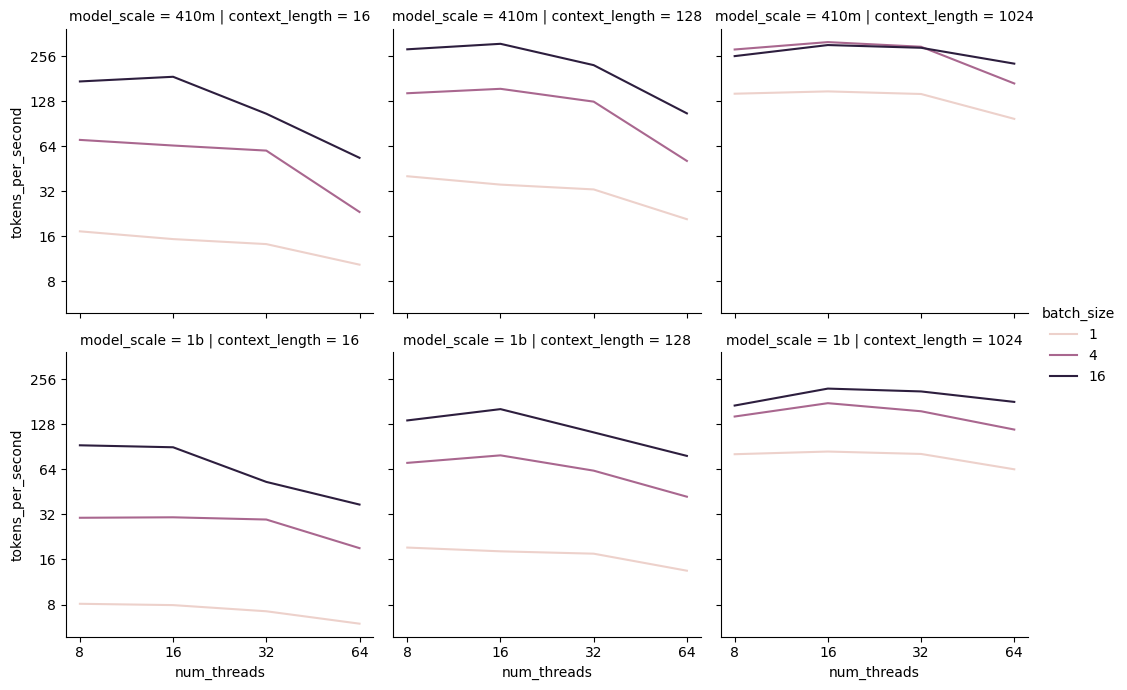

In [4]:
g = sns.relplot(data=df.pipe(lambda d: d[d.num_tokens == 64]).pipe(lambda d: d[d.model_scale != "2.8b"]),
                y="tokens_per_second", x="num_threads", hue="batch_size", hue_norm=matplotlib.colors.LogNorm(),
                col="context_length", row="model_scale", row_order=["410m", "1b"],
                kind="line", height=3.5)
for ax in g.axes.flatten():
    ax.set_xscale("log", base=2)
    ax.set_yscale("log", base=2)
    ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())